In [1]:
import sys
import emission.public.pull_and_load_public_data as plpd
import pandas as pd
import emission.storage.timeseries.aggregate_timeseries as estag
public_ids = estag.TEST_PHONE_IDS
import arrow
from uuid import UUID
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

import emission.core.get_database as edb
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as pydt
import emission.storage.timeseries.abstract_timeseries as esta
import emission.storage.timeseries.timequery as estt
import numpy as np
import emission.analysis.point_features as pf
import attrdict as ad
import scipy.interpolate as spi
import emission.core.wrapper.entry as ecwe
import emission.core.wrapper.location as ecwl

Get starting timestamp

In [2]:
from_ts = arrow.get('2017-01-26T17:56:20.000-08:00').timestamp
from_ts
arrow.get(from_ts).to("America/Los_Angeles")

<Arrow [2017-01-26T17:56:20-08:00]>

Get end timestamp

In [65]:
end_ts = arrow.get("2017-01-26T18:15:00.000-08.00").timestamp
end_ts
arrow.get(end_ts)

<Arrow [2017-01-27T02:15:00+00:00]>

Loading data, between timestamps, from server.

In [4]:
plpd.request_batched_data("https://e-mission.eecs.berkeley.edu",
                          from_ts ,end_ts, map(str, public_ids))

Data loaded to local server!


Function to get range of points for a specific phone time series

In [5]:
def get_points_from_ts_for_range(ts, start_ts, end_ts):
    return ts.get_data_df("background/location", 
                          estt.TimeQuery('metadata.write_ts', 
                                         start_ts, end_ts))

In [6]:
iphone_id_3 = [UUID("c528bcd2-a88b-3e82-be62-ef4f2396967a")]
iphone_id_4 = [UUID("95e70727-a04e-3e33-b7fe-34ab19194f8b")]
android_id_3 = [UUID("86842c35-da28-32ed-a90e-2da6663c5c73")]
android_id_4 = [UUID("3bc0f91f-7660-34a2-b005-5c399598a369")]

In [7]:
iphone_ts_3 = map(lambda u: esta.TimeSeries.get_time_series(u),
                  iphone_id_3)
iphone_ts_4 = map(lambda u: esta.TimeSeries.get_time_series(u),
                  iphone_id_4)
android_ts_3 = map(lambda u: esta.TimeSeries.get_time_series(u),
                   android_id_3)
android_ts_4 = map(lambda u: esta.TimeSeries.get_time_series(u),
                   android_id_4)

In [8]:
iphone_df_3 = get_points_from_ts_for_range(iphone_ts_3[0],from_ts,
                                           end_ts)
iphone_df_4 = get_points_from_ts_for_range(iphone_ts_4[0],from_ts,
                                           end_ts)
android_df_3 = get_points_from_ts_for_range(android_ts_3[0],from_ts,
                                            end_ts)  
android_df_4 = get_points_from_ts_for_range(android_ts_4[0],from_ts,
                                            end_ts)

In [9]:
new_iphone_df_3 = iphone_df_3[['latitude','longitude','ts']].copy()
new_iphone_df_4 = iphone_df_4[['latitude','longitude','ts']].copy()
new_android_df_3 = android_df_3[['latitude','longitude','ts']].copy()
new_android_df_4 = android_df_4[['latitude','longitude','ts']].copy()

Importing ground truth points and plotting using matplotlib. 

In [10]:
ground_truth = pd.read_csv("/Users/jlamba/Desktop/e-mission berkeley trip ground truth - Sheet1 .csv")

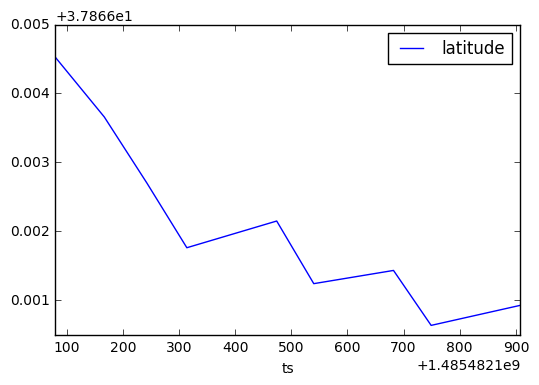

In [11]:
gt_time = ground_truth['fmt_time']
gt_time2 = []
for elem in gt_time:
    gt_time2.append(arrow.get('2017-01-26T'+ elem +'.000-08:00').timestamp)
ground_truth['ts'] = gt_time2
ground_truth
ground_truth.plot(x = 'ts',y = 'latitude')

Plot comparing raw latitudes of all 4 phones and ground truth

[<matplotlib.lines.Line2D object at 0x114222510>, <matplotlib.lines.Line2D object at 0x11407c7d0>, <matplotlib.lines.Line2D object at 0x11407e150>, <matplotlib.lines.Line2D object at 0x1141c7dd0>, <matplotlib.lines.Line2D object at 0x1141d6fd0>] [u'latitude', u'latitude', u'latitude', u'latitude', u'latitude']


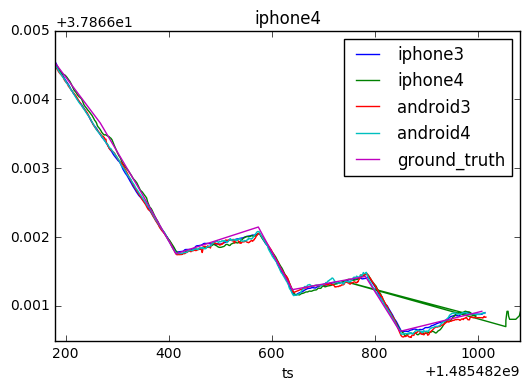

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=1)

new_iphone_df_3.index = new_iphone_df_3['ts']
new_iphone_df_4.index = new_iphone_df_4['ts']
new_android_df_3.index = new_android_df_3['ts']
new_android_df_4.index = new_android_df_4['ts']

df1 = pd.DataFrame(new_iphone_df_3, index=new_iphone_df_3.index,columns=['latitude'])
df2 = pd.DataFrame(new_iphone_df_4, index=new_iphone_df_4.index,columns=['latitude'])
df3 = pd.DataFrame(new_android_df_3, index=new_android_df_3.index,columns=['latitude'])
df4 = pd.DataFrame(new_android_df_4, index=new_android_df_4.index,columns=['latitude'])

df1.plot(ax=axes, title = 'iphone3')
df2.plot(ax=axes,title = 'iphone4' )
df3.plot(ax=axes, label = 'android3')
df4.plot(ax = axes, label = 'android4')
ground_truth.plot(x = 'ts', y = 'latitude', ax = axes)

lines, labels = axes.get_legend_handles_labels()
print lines, labels
axes.legend(lines, ["iphone3", "iphone4", "android3", "android4","ground_truth"], loc='best') 

Plot comparing raw longitudes of all 4 phones and ground truth.

[<matplotlib.lines.Line2D object at 0x1142d8450>, <matplotlib.lines.Line2D object at 0x1145a2690>, <matplotlib.lines.Line2D object at 0x11459afd0>, <matplotlib.lines.Line2D object at 0x1145bd8d0>, <matplotlib.lines.Line2D object at 0x1145e0e90>] [u'longitude', u'longitude', u'longitude', u'longitude', u'longitude']


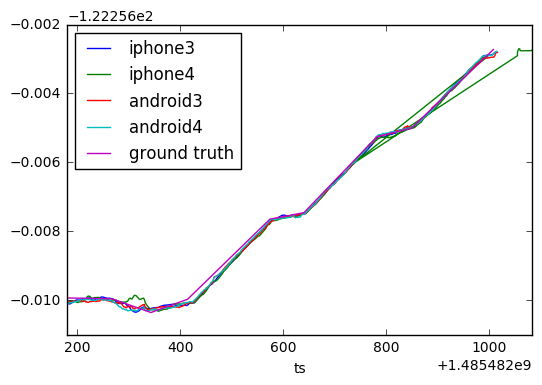

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=1)

df2_2 = pd.DataFrame(new_iphone_df_4, index=new_iphone_df_4.index,columns=['longitude'])
df3_3 = pd.DataFrame(new_android_df_3, index=new_android_df_3.index,columns=['longitude'])
df4_4 = pd.DataFrame(new_android_df_4, index=new_android_df_4.index,columns=['longitude'])
df1_1 = pd.DataFrame(new_iphone_df_3, index=new_iphone_df_3.index,columns=['longitude'])

df1_1.plot(ax=axes)
df2_2.plot(ax=axes)
df3_3.plot(ax=axes)
df4_4.plot(ax = axes)
ground_truth.plot(x = 'ts', y = 'longitude', ax = axes)
lines, labels = axes.get_legend_handles_labels()
print lines, labels
axes.legend(lines, ["iphone3", "iphone4", "android3", "android4", 'ground truth'], loc='best')

# Interpolation

In [14]:
import numpy as np
iphone_xnew = np.arange(from_ts, end_ts, 15 * 60) # 15 minutes
android_xnew = np.arange(from_ts, end_ts, 15 * 60) # 15 minutes

In [15]:
import scipy.interpolate as spi
import numpy as np
%matplotlib inline

def get_interpolated(x, y, xnew):
    # fn = spi.interp1d(x=x, y=y, bounds_error=False, fill_value=y.iloc[-1])
    fn = spi.interp1d(x=x, y=y, bounds_error=False)
    return fn(xnew)

In [16]:
def get_interpolated_df_latitude(sensor_df, xnew):
    local_dt_new = map(pydt.datetime.fromtimestamp, xnew)
    fmt_time_new = map(lambda dt: dt.isoformat(), local_dt_new)
    interpolated_series = get_interpolated(sensor_df.ts, sensor_df.latitude, xnew)
    interpolated_df = pd.DataFrame(data={'ts': xnew, 'metadata_write_ts': xnew, 'local_dt': local_dt_new, 'fmt_time': fmt_time_new, 'y': interpolated_series})
    return interpolated_df

In [69]:
def get_interp_distance_df(android3_ts, android4_ts, ios3_ts, ios4_ts, ground_truth_df, start_ts, end_ts):
    android3_df = android3_ts.get_data_df("background/location", estt.TimeQuery('metadata.write_ts', start_ts, end_ts))
    android4_df = android4_ts.get_data_df("background/location", estt.TimeQuery('metadata.write_ts', start_ts, end_ts))
    ios3_df = ios3_ts.get_data_df("background/location", estt.TimeQuery('metadata.write_ts', start_ts, end_ts))
    ios4_df = ios4_ts.get_data_df("background/location", estt.TimeQuery('metadata.write_ts', start_ts, end_ts))
    android3_latf = spi.interp1d(x=android3_df.ts, y=android3_df.latitude, bounds_error=False,
                                fill_value="extrapolate")
    android3_lngf = spi.interp1d(x=android3_df.ts, y=android3_df.longitude, bounds_error=False, 
                                fill_value="extrapolate")
    android4_latf = spi.interp1d(x=android4_df.ts, y=android4_df.latitude, bounds_error=False, 
                                fill_value="extrapolate")
    android4_lngf = spi.interp1d(x=android4_df.ts, y=android4_df.longitude, bounds_error=False, 
                                fill_value="extrapolate")
    ios3_latf = spi.interp1d(x=ios3_df.ts, y=ios3_df.latitude, bounds_error=False, 
                            fill_value=(ios3_df.latitude.iloc[0], ios3_df.latitude.iloc[-1]))
    ios3_lngf = spi.interp1d(x=ios3_df.ts, y=ios3_df.longitude, bounds_error=False, 
                            fill_value=(ios3_df.longitude.iloc[0], ios3_df.longitude.iloc[-1]))
    ios4_latf = spi.interp1d(x=ios4_df.ts, y=ios4_df.latitude, bounds_error=False, 
                            fill_value=(ios4_df.latitude.iloc[0], ios4_df.latitude.iloc[-1]))
    ios4_lngf = spi.interp1d(x=ios4_df.ts, y=ios4_df.longitude, bounds_error=False, 
                            fill_value=(ios4_df.longitude.iloc[0], ios4_df.longitude.iloc[-1]))
    ground_truth_latf = spi.interp1d(x = ground_truth_df.ts, y = ground_truth.latitude, bounds_error=False, 
                                     fill_value=(ground_truth.latitude.iloc[0], ground_truth.latitude.iloc[-1]))
    ground_truth_lngf = spi.interp1d(x = ground_truth_df.ts, y = ground_truth.longitude, bounds_error=False, 
                                     fill_value=(ground_truth.longitude.iloc[0], ground_truth.longitude.iloc[-1]))
    ts_new = np.arange(int(start_ts), int(end_ts - 290), 1)
    fmt_time_new = map(lambda ts: pydt.datetime.fromtimestamp(ts).isoformat(), ts_new)
    interp_df = pd.DataFrame({"ts": ts_new, "fmt_time": fmt_time_new,
                            "android3_lat": android3_latf(ts_new), "android3_lng": android3_lngf(ts_new),
                              "android4_lat": android4_latf(ts_new), "android4_lng": android4_lngf(ts_new),
                              "ios3_lat": ios3_latf(ts_new),"ios3_lng": ios3_lngf(ts_new),
                            "ios4_lat": ios4_latf(ts_new), "ios4_lng": ios4_lngf(ts_new), 
                              "ground_truth_lat":ground_truth_latf(ts_new),"ground_truth_lng":ground_truth_lngf(ts_new) },
                             index=ts_new)
    baseline_distances_1 = np.abs(interp_df.apply(calDistance1, axis=1))
    baseline_distances_2 = np.abs(interp_df.apply(calDistance2, axis=1))
    baseline_distances_3 = np.abs(interp_df.apply(calDistance3, axis=1))
    baseline_distances_4 = np.abs(interp_df.apply(calDistance4, axis=1))

    interp_df["mean_lat"] = interp_df.apply(meanLat, axis=1)
    interp_df["mean_lng"] = interp_df.apply(meanLng, axis=1)
    
    interp_df["baseline_distances1"] = baseline_distances_1
    interp_df["baseline_distances2"] = baseline_distances_2
    interp_df["baseline_distances3"] = baseline_distances_3
    interp_df["baseline_distances4"] = baseline_distances_4
    interp_df["ground_distances"] = np.abs(interp_df.apply(groundDistance, axis=1))
    return interp_df

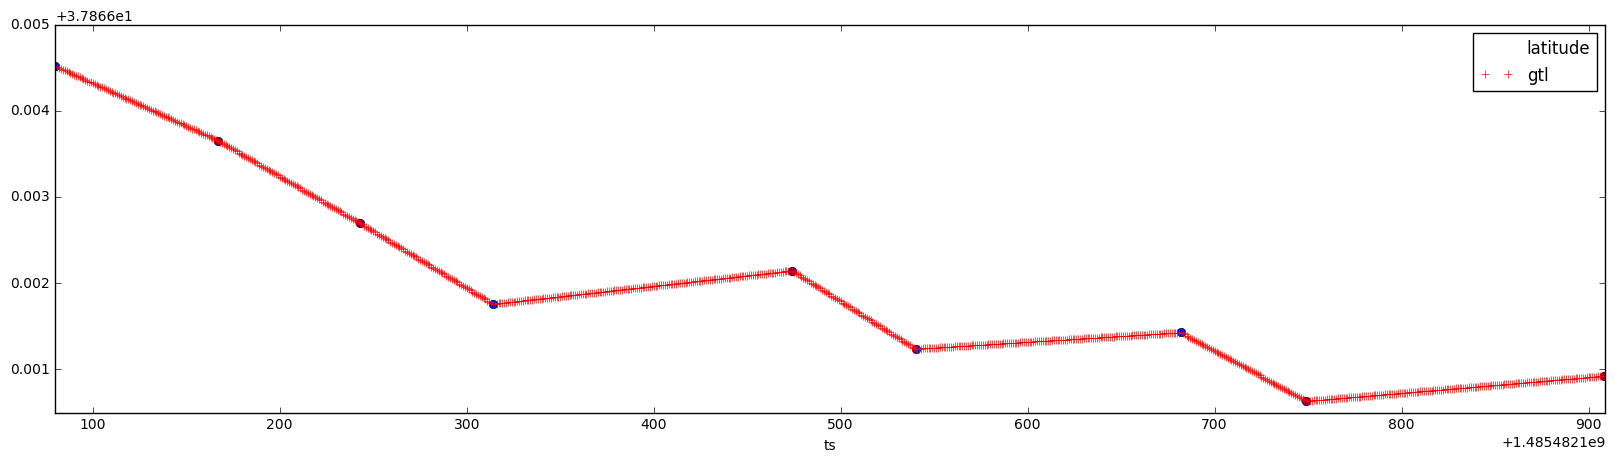

In [68]:
fig, axes = plt.subplots(ncols=1, nrows=1, sharex=True, sharey=True, figsize=(20,5))
gt_time = ground_truth['fmt_time']
gt_time2 = []
for elem in gt_time:
    gt_time2.append(arrow.get('2017-01-26T'+ elem +'.000-08:00').timestamp)
ground_truth['ts'] = gt_time2
ground_truth
ground_truth.plot(x = 'ts',y = 'latitude', ax=axes, style='bo')

ts_new = np.arange(int(from_ts), int(end_ts - 290), 1)
ground_truth_latf = spi.interp1d(x = ground_truth.ts, y = ground_truth.latitude, bounds_error=False, 
                                     fill_value=(ground_truth.latitude.iloc[0], ground_truth.latitude.iloc[-1]))
ground_truth_lngf = spi.interp1d(x = ground_truth.ts, y = ground_truth.longitude, bounds_error=False, 
                                     fill_value=(ground_truth.longitude.iloc[0], ground_truth.longitude.iloc[-1]))
pd.DataFrame({"ts": ts_new, "gtl": ground_truth_latf(ts_new)}).plot(x = 'ts', y = 'gtl', ax=axes, style='r+')

In [71]:
def calDistance1(row):
    return pf.calDistance(ad.AttrDict({"latitude": row["android3_lat"], "longitude": row["android3_lng"]}),
                          ad.AttrDict({"latitude": row["android4_lat"], "longitude": row["android4_lng"]}))

In [72]:
def calDistance2(row):
    return pf.calDistance(ad.AttrDict({"latitude": row["ios3_lat"], "longitude": row["ios3_lng"]}),
                          ad.AttrDict({"latitude": row["ios4_lat"], "longitude": row["ios4_lng"]}))

In [73]:
def calDistance3(row):
    return pf.calDistance(ad.AttrDict({"latitude": row["ios3_lat"], "longitude": row["ios3_lng"]}),
                          ad.AttrDict({"latitude": row["android3_lat"], "longitude": row["android3_lng"]}))

In [74]:
def calDistance4(row):
    return pf.calDistance(ad.AttrDict({"latitude": row["ios4_lat"], "longitude": row["ios4_lng"]}),
                          ad.AttrDict({"latitude": row["android4_lat"], "longitude": row["android4_lng"]}))

In [75]:
def groundDistance(row):
    print "calculating distances for row %s " % row
    return pf.calDistance(ad.AttrDict({"latitude": row["ground_truth_lat"], "longitude": row["ground_truth_lng"]}),
                          ad.AttrDict({"latitude": row["mean_lat"], "longitude": row["mean_lng"]}))

In [77]:
def meanLat(row):
    return np.mean([row["android3_lat"], row["android4_lat"], 
                    row["ios3_lat"], row["ios4_lat"]])

In [78]:
def meanLng(row):
    return np.mean([row["android3_lng"], row["android4_lng"],
                    row["ios3_lng"], row["ios4_lng"]])

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
distances = get_interp_distance_df(android_ts_3[0],android_ts_4[0],
                                   iphone_ts_3[0], iphone_ts_4[0], ground_truth, from_ts, end_ts)

calculating distances for row android3_lat                         37.87
android3_lng                       -122.27
android4_lat                         37.87
android4_lng                       -122.27
fmt_time               2017-01-26T17:56:20
ground_truth_lat                     37.87
ground_truth_lng                   -122.27
ios3_lat                             37.87
ios3_lng                           -122.27
ios4_lat                             37.87
ios4_lng                           -122.27
ts                              1485482180
mean_lat                             37.87
mean_lng                           -122.27
baseline_distances1                   2.94
baseline_distances2                   6.83
baseline_distances3                   8.19
baseline_distances4                   1.75
Name: 1485482180, dtype: object 
calculating distances for row android3_lat                         37.87
android3_lng                       -122.27
android4_lat                         37.87
andr

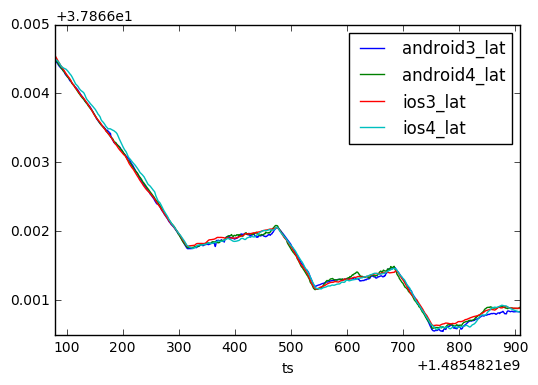

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=1)
distances.plot(x = "ts", y = "android3_lat", ax = axes)
distances.plot(x = "ts", y = "android4_lat", ax = axes)
distances.plot(x = "ts", y = "ios3_lat", ax = axes)
distances.plot(x = "ts", y = "ios4_lat", ax = axes)

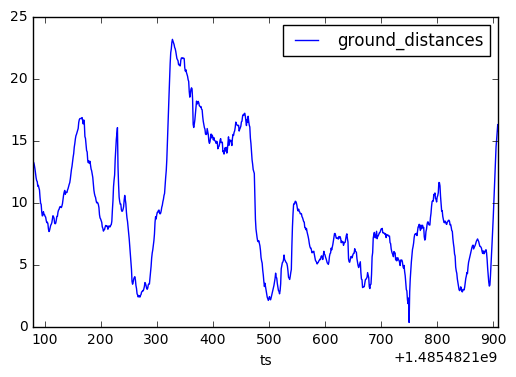

In [82]:
distances.plot(x="ts", y="ground_distances")

In [28]:
import scipy.stats as spis

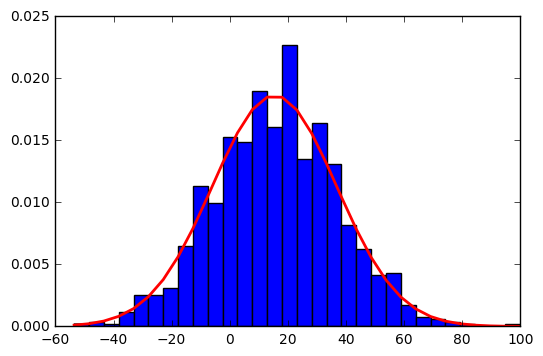

In [83]:
#Example: Baseline Distances 3
mu, sigma = 15.36, 21.42 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

Android3 vs. Android4

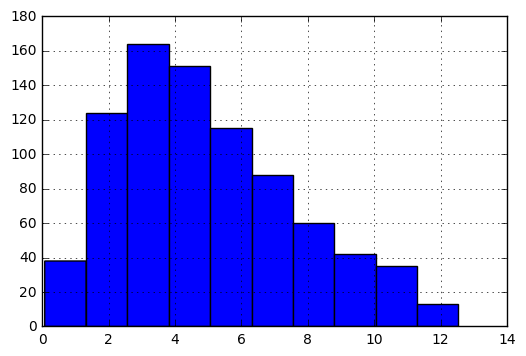

In [84]:
distances.baseline_distances1.hist()

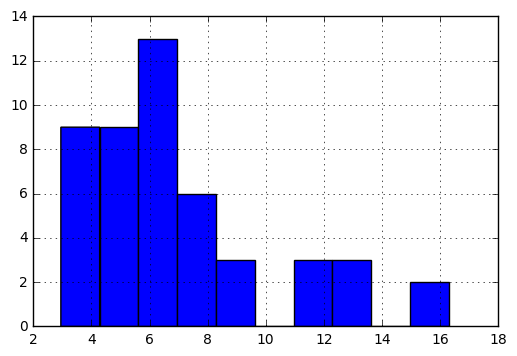

In [85]:
Quantity = []
d = {}
distances1 = distances[["fmt_time","ts", "mean_lat", "mean_lng", "baseline_distances1", 
                       "ground_distances"]].copy()
Threshold = sorted([100, 90, 80, 70, 60, 40, 30, 20, 15, 10, 5])
#for T in Threshold:
    #d["f_dist{0}".format(T)] = distances1[distances1.baseline_distances1 < T]
    #Quantity.append(distances1.baseline_distances1.describe()["count"])
#d["f_dist5"].head()
f_dist_90_10 = distances1[(distances1.baseline_distances1< 90) &
                               (distances1.baseline_distances1 > 10)]
f_dist_90_10.ground_distances.hist()

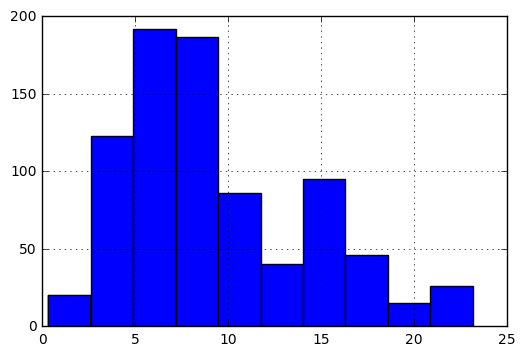

In [86]:
f_dist_90 = distances1[(distances1.baseline_distances1< 90)]
f_dist_90.ground_distances.hist()

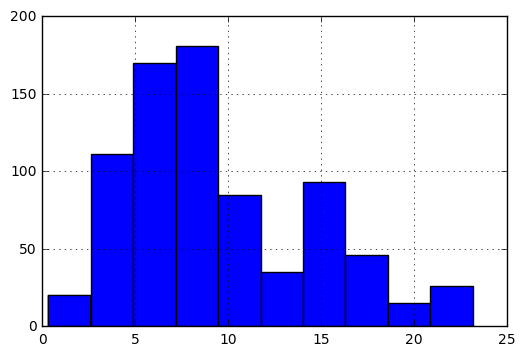

In [87]:
f_dist_10 = distances1[(distances1.baseline_distances1 < 10)]
f_dist_10.ground_distances.hist()

In [88]:
Th = []
Quan = []
Qual = []
for T in Threshold:
    Th.append(T)
    Quan.append(d["f_dist{0}".format(T)].baseline_distances1.describe()["count"])
    Qual.append(d["f_dist{0}".format(T)]["ground_distances"].mean())
final_df = pd.DataFrame({"Threshold":Th, "Quantity":Quan, "Quality":Qual})
final_df

KeyError: 'f_dist5'

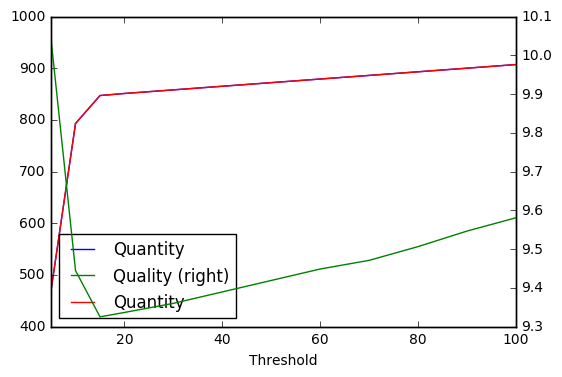

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=1)
final_df.plot(x="Threshold", y="Quantity", ax=ax)
final_df.plot(x="Threshold", secondary_y="Quality", ax=ax)

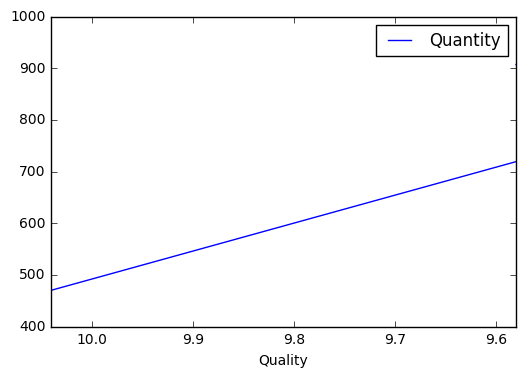

In [77]:
fig, ax = plt.subplots(nrows=1, ncols=1)
final_df.plot(x="Quality", y="Quantity", ax=ax)

Distribution of ground_truth against different thresholds.

ios3 vs. ios4

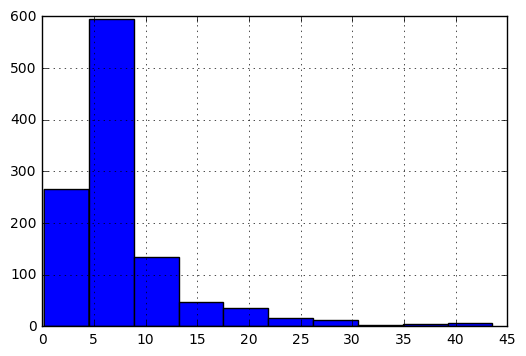

In [52]:
distances.baseline_distances2.hist()

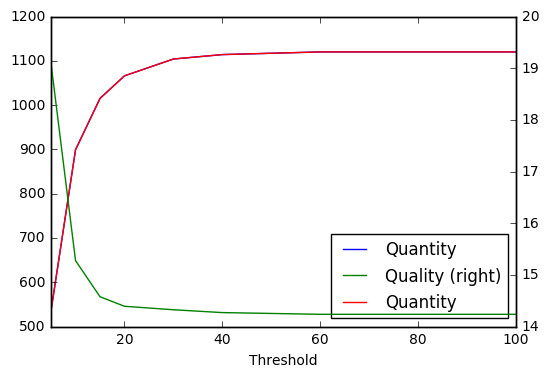

In [57]:
Quantity = []
d = {}
distances2 = distances[["fmt_time","ts", "mean_lat", "mean_lng", "baseline_distances2", 
                       "ground_distances"]].copy()
Threshold = sorted([100, 90, 80, 70, 60, 40, 30, 20, 15, 10, 5])
for T in Threshold:
    d["f_dist{0}".format(T)] = distances2[distances2.baseline_distances2 < T]
    Quantity.append(distances2.baseline_distances2.describe()["count"])
Th = []
Quan = []
Qual = []
for T in Threshold:
    Th.append(T)
    Quan.append(d["f_dist{0}".format(T)].baseline_distances2.describe()["count"])
    Qual.append(d["f_dist{0}".format(T)]["ground_distances"].mean())
final_df = pd.DataFrame({"Threshold":Th, "Quantity":Quan, "Quality":Qual})

fig, ax = plt.subplots(nrows=1, ncols=1)
final_df.plot(x="Threshold", y="Quantity", ax=ax)
final_df.plot(x="Threshold", secondary_y="Quality", ax=ax)

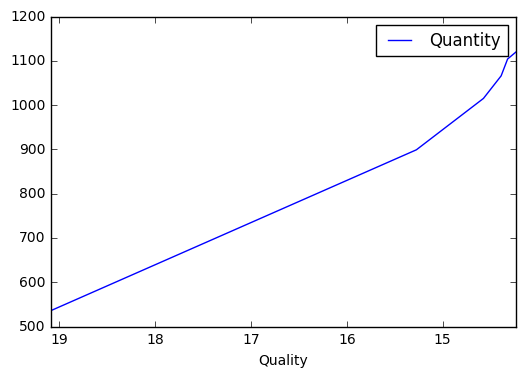

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=1)
final_df.plot(x="Quality", y="Quantity", ax=ax)

ios3 vs. android3

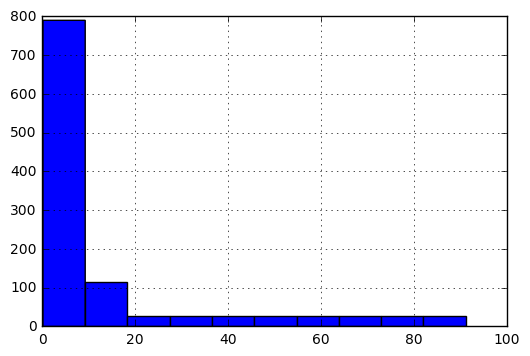

In [59]:
distances.baseline_distances3.hist()

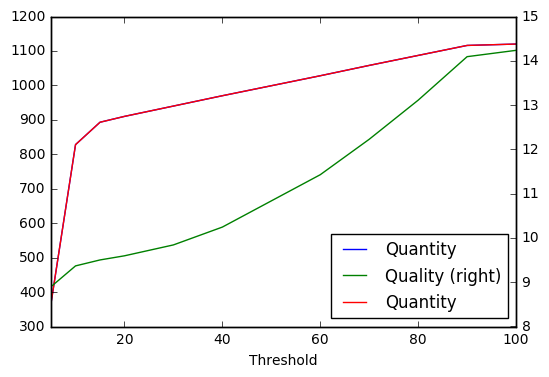

In [60]:
Quantity = []
d = {}
distances3 = distances[["fmt_time","ts", "mean_lat", "mean_lng", "baseline_distances3", 
                       "ground_distances"]].copy()
Threshold = sorted([100, 90, 80, 70, 60, 40, 30, 20, 15, 10, 5])
for T in Threshold:
    d["f_dist{0}".format(T)] = distances3[distances3.baseline_distances3 < T]
    Quantity.append(distances3.baseline_distances3.describe()["count"])
Th = []
Quan = []
Qual = []
for T in Threshold:
    Th.append(T)
    Quan.append(d["f_dist{0}".format(T)].baseline_distances3.describe()["count"])
    Qual.append(d["f_dist{0}".format(T)]["ground_distances"].mean())
final_df = pd.DataFrame({"Threshold":Th, "Quantity":Quan, "Quality":Qual})

fig, ax = plt.subplots(nrows=1, ncols=1)
final_df.plot(x="Threshold", y="Quantity", ax=ax)
final_df.plot(x="Threshold", secondary_y="Quality", ax=ax)

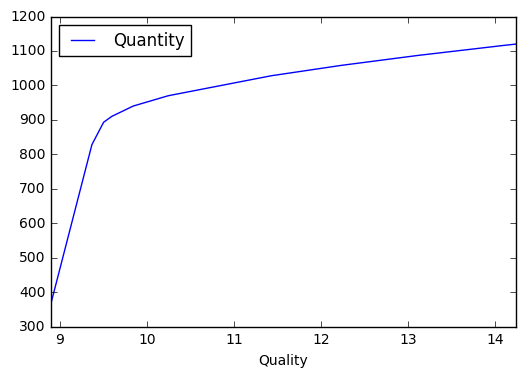

In [61]:
fig, ax = plt.subplots(nrows=1, ncols=1)
final_df.plot(x="Quality", y="Quantity", ax=ax)

ios4 vs android4

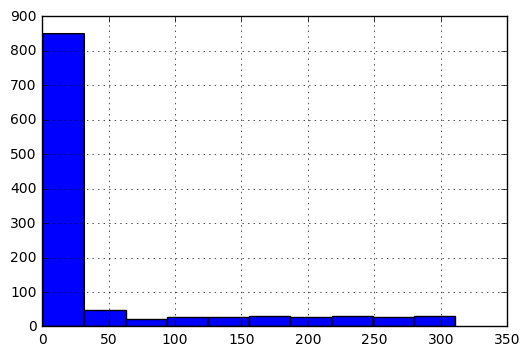

In [62]:
distances.baseline_distances4.hist()

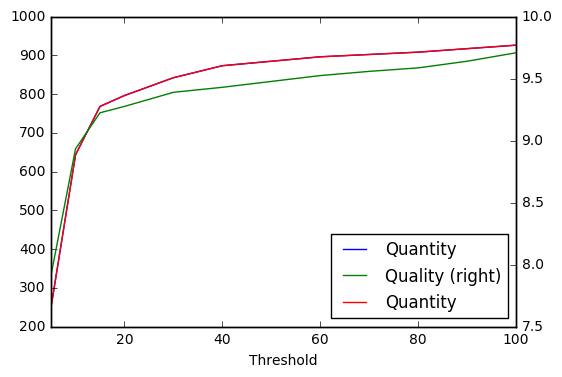

In [63]:
Quantity = []
d = {}
distances4 = distances[["fmt_time","ts", "mean_lat", "mean_lng", "baseline_distances4", 
                       "ground_distances"]].copy()
Threshold = sorted([100, 90, 80, 70, 60, 40, 30, 20, 15, 10, 5])
for T in Threshold:
    d["f_dist{0}".format(T)] = distances4[distances4.baseline_distances4 < T]
    Quantity.append(distances4.baseline_distances4.describe()["count"])
Th = []
Quan = []
Qual = []
for T in Threshold:
    Th.append(T)
    Quan.append(d["f_dist{0}".format(T)].baseline_distances4.describe()["count"])
    Qual.append(d["f_dist{0}".format(T)]["ground_distances"].mean())
final_df = pd.DataFrame({"Threshold":Th, "Quantity":Quan, "Quality":Qual})

fig, ax = plt.subplots(nrows=1, ncols=1)
final_df.plot(x="Threshold", y="Quantity", ax=ax)
final_df.plot(x="Threshold", secondary_y="Quality", ax=ax)

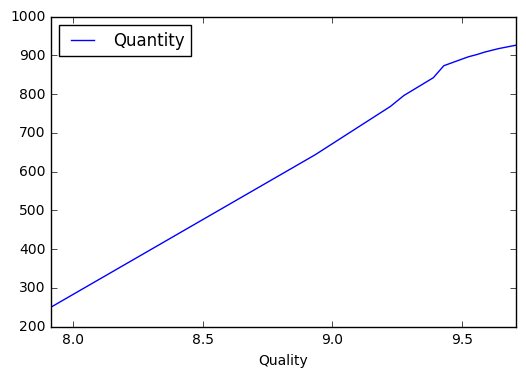

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=1)
final_df.plot(x="Quality", y="Quantity", ax=ax)

In [48]:
gt_gj = [{
  "type": "Feature",
  "geometry": {
    "type": "Point",
    "coordinates": [[37.8705228,-122.2659393], [37.8696579, -122.2659628], 
        [37.8686967, -122.2663615],
        [37.8677596, -122.2659781], [37.8681473, -122.2636508],
        [37.8672381, -122.2634622], [37.8674299, -122.2612558], 
        [37.8666323, -122.261009], [37.8669238, -122.2587255]]
  }
}]


In [49]:
s = new_iphone_df_3.ts

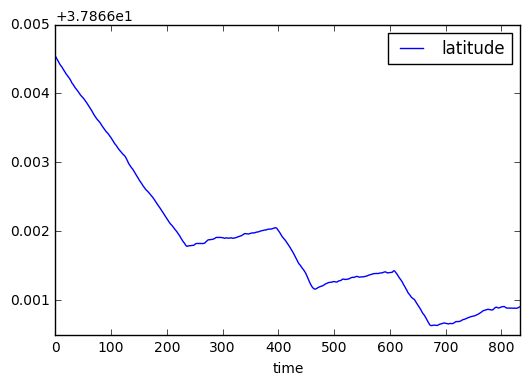

In [50]:
s = s - s.iloc[0]
df = pd.DataFrame()
df['time'] = s
df['latitude'] = new_iphone_df_3['latitude']
df.plot(x = 'time',y = 'latitude')

In [ ]:
import emission.analysis.plotting.leaflet_osm.our_plotter as lo
import emission.analysis.plotting.geojson.geojson_feature_converter as gfc
import emission.analysis.plotting.leaflet_osm.ipython_helper as ipy

In [ ]:
    ipy.inline_maps([lo.get_maps_for_geojson_unsectioned(
                [gfc.get_feature_list_from_df(iphone_df_3)]) + 
                    lo.get_maps_for_geojson_unsectioned(
                [gfc.get_feature_list_from_df(iphone_df_4)]) + 
                     lo.get_maps_for_geojson_unsectioned(
                [gfc.get_feature_list_from_df(android_df_3)]) +
                     lo.get_maps_for_geojson_unsectioned(
                [gfc.get_feature_list_from_df(android_df_4)])])

In [ ]:
import geojson as gj

In [ ]:
ipy.inline_maps([lo.get_maps_for_geojson_unsectioned(gt_gj)])

In [ ]:
gfc.get_feature_list_from_df(iphone_df_3)["features"][1]